# Data Science Final Project 

# Predicting the medal tally of the Tokyo 2020 Olympics
##### Presented by Meiirbek Islamov, Jian Lin, Vera Smirnova. 

The modern Olympic Games are a leading international sporting event featuring winter and summer sports held every
four years. During the event thousands of athletes participate in sport competition representing their countries and winning medals for the best performances.

This project aims to investigate how the origin of the countries and some of their characteristics would affect the number of medals won. To begin this project it was important to understand what characteristics of the country will have some correlation with the number of medals that country wins. We analyzed four parameters: GDP, GDP per capita, population and the size of the team. 
## Assumptions
For this analysis we made a number of assumptions:

 - Only Summer Olympics from 1964 - 2016 were analyzed.
    - No accurate GDP/Population data was found for earlier years.
 - Countries that seize to exist were counted as current countries. 
    - Soviet Union -> Russia, GDR and FRG -> Germany
 - No differentiation by the kind of medal in our analysis.
    - Gold, Silver and Bronze medals all just considered medals.
 - Team medals are counted as one medal per country.
    - Every player on volleyball team receives a medal, but that only counts as one medal for that country. 
 - When some of the data for one of the parameters was missing we omitted that data point. 


## Looking at Correlations between GDP, GDPC, population and team size vs the number of medals won. 

### GDP


Here is our code to see if there is a correlation between GDP (Gross Domestic Product) and the number of medals the country wins: 

In [113]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import numdifftools as nd
from mpl_toolkits.mplot3d import Axes3D
from decimal import Decimal
from scipy import stats
from scipy.optimize import minimize
from scipy.stats import multivariate_normal, norm
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'

[9.53915396e-12 2.80537387e+00]
The most probable value of m is 9.539154e-12, b is 2.8054.


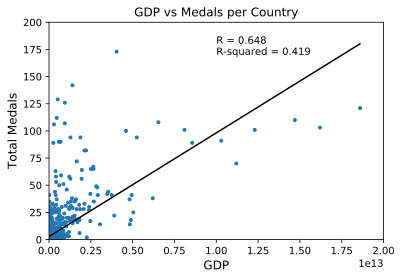

In [114]:
## Importing Data
olympics = pd.read_csv('export_olympics_2.csv')
olympics1 = olympics.dropna() 
olympics1.to_csv('Droptest.csv')

## Finding correlation between parameters in dataframe type 
GDPCdf = (olympics1["GDP"] / olympics1["Population"]).fillna(0)
Corr = olympics1['GDP'].corr(olympics1['Medal_Won_Corrected'])
Corr1 = GDPCdf.corr(olympics1['Medal_Won_Corrected'])
Corr2 = olympics1['Population'].corr(olympics1['Medal_Won_Corrected'])
Corr3 = olympics1['Total_Athletes'].corr(olympics1['Medal_Won_Corrected'])
CoDet = Corr**2 
CoDet1 = Corr1**2
CoDet2 = Corr2**2
CoDet3 = Corr3**2

## Changing dataframe to numpy.array type
olympics1 = olympics1.values

Year = olympics1[:,1]
Team = olympics1[:,2]
Medal_Won = olympics1[:,3]
GDP = olympics1[:,4]
Population = olympics1[:,5]
Team_Size = olympics1[:,6] 

## Plotting Data GDP vs Medal_Won throughout all years
plt.plot(GDP,Medal_Won,'.')
plt.title('GDP vs Medals per Country')
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Total Medals', fontsize=12);
plt.xlim([0,(2.0*10**13)])
plt.ylim([0,200]);

## LLSR Regression for GDP vs Medal_Won
Intercept = np.ones(GDP.size)
CombinedMatrix = np.column_stack([GDP,Intercept])

## Compute A Matrix 
A = np.dot(np.transpose(CombinedMatrix), CombinedMatrix)
A = A.astype(float) 

## Compute b Vector
b = np.dot(Medal_Won, CombinedMatrix)
b = b.astype(float)

## Solve for best fit paramters
X = np.linalg.solve(A, b)
print(X)
print('The most probable value of m is %e, b is %.4f.'%(X[0],X[1]))

## Plotting best fit line
TM = X[0] * GDP + X[1]
plt.plot(GDP,TM,'-k');
plt.text(10*10**12, 170, 'R = %0.3f\nR-squared = %0.3f'%(Corr,CoDet));

The results show a positive correlation for the GDP. Therefore it makes sense to include GDP as part of our future model to predict the number of medals that a country will achieve in Tokyo. 

In [115]:
## Computing Sample Variance and Confidence Intervals
N = GDP.size

## Compute the sample variance
S1 = np.sum((TM-Medal_Won)**2) / N 

## Update A matrix (Hessian Matrix)
A1 = np.dot(np.transpose(CombinedMatrix), CombinedMatrix) /S1
A1 = A1.astype(float) 

VarMat1 = la.inv(A1)

print(VarMat1)
SigmaMat1 = np.sqrt(VarMat1)

print('The confidence interval for m is %e.'%(SigmaMat1[0,0]))
print('The confidence interval for b is %.4f.'%(SigmaMat1[1,1]))
print('The 95 percent confidence interval for m is: (%e ± %e)'%(X[0],SigmaMat1[0,0]*2))
print('The 95 percent confidence interval for b is: (%.4f ± %.4f)'%(X[1],SigmaMat1[1,1]*2))

[[ 6.60710131e-26 -1.34972063e-14]
 [-1.34972063e-14  6.60797992e-02]]
The confidence interval for m is 2.570428e-13.
The confidence interval for b is 0.2571.
The 95 percent confidence interval for m is: (9.539154e-12 ± 5.140856e-13)
The 95 percent confidence interval for b is: (2.8054 ± 0.5141)


C:\Users\Jian_\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


In [116]:
##Checking Results
Medal_Won = Medal_Won.astype(float)
CombinedMatrix = CombinedMatrix.astype(float)

model = sm.OLS(Medal_Won, sm.add_constant(CombinedMatrix))
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     1376.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):          3.81e-227
Time:                        17:03:47   Log-Likelihood:                -7276.8
No. Observations:                1907   AIC:                         1.456e+04
Df Residuals:                    1905   BIC:                         1.457e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          9.539e-12   2.57e-13     37.092      0.0

### GDPC

Here is our code to see if there is a correlation between GDPC and the number of medals the country wins: 

[1.58715800e-04 3.37458192e+00]
The most probable value of m is 1.587158e-04, b is 3.3746.


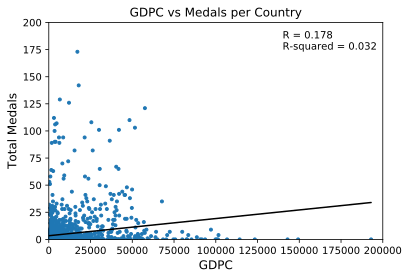

In [117]:
GDPC = GDP/Population

## Plotting Data GDPC per capita vs Medal_Won throughout all years
plt.plot(GDPC,Medal_Won,'.')
plt.title('GDPC vs Medals per Country')
plt.xlabel('GDPC', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)
plt.xlim([0,(2.0*10**5)])
plt.ylim([0,200]);

## LLSR Regression
CombinedMatrix1 = np.column_stack([GDPC,Intercept])

## Compute A Matrix 
A1 = np.dot(np.transpose(CombinedMatrix1), CombinedMatrix1)
A1 = A1.astype(float) 

## Compute b Vector
b1 = np.dot(Medal_Won, CombinedMatrix1)
b1 = b1.astype(float)

## Solve for best fit paramters
X1 = np.linalg.solve(A1, b1)
print(X1)
print('The most probable value of m is %e, b is %.4f.'%(X1[0],X1[1]))

## Plotting best fit line
TM1 = X1[0] * GDPC + X1[1]
plt.plot(GDPC,TM1,'-k');
plt.text(140000, 175, 'R = %0.3f\nR-squared = %0.3f'%(Corr1,CoDet1));

There is a poor correlation between GDPC and medal count. It is most likely due to the fact that most countries with the high GDPC are smaller but much richer european or asian countries (Luxembourg, Switzerland, Macao) which do not have a lot of resources or large populations to assemble big strong teams.

In [118]:
## Computing Sample Variance and Confidence Intervals
N = GDP.size

## Compute the sample variance
S2 = np.sum((TM1-Medal_Won)**2) / N 

## Update A matrix (Hessian Matrix)
A2 = np.dot(np.transpose(CombinedMatrix1), CombinedMatrix1) /S2
A2 = A2.astype(float) 

VarMat2 = la.inv(A2)

print(VarMat2)
SigmaMat2 = np.sqrt(VarMat2)

print('The confidence interval for m is %e.'%(SigmaMat2[0,0]))
print('The confidence interval for b is %.4f.'%(SigmaMat2[1,1]))
print('The 95 percent confidence interval for m is: (%e ± %e)'%(X1[0],SigmaMat2[0,0]*2))
print('The 95 percent confidence interval for b is: (%.4f ± %.4f)'%(X1[1],SigmaMat2[1,1]*2))

[[ 4.04880741e-10 -3.51903034e-06]
 [-3.51903034e-06  1.36194306e-01]]
The confidence interval for m is 2.012165e-05.
The confidence interval for b is 0.3690.
The 95 percent confidence interval for m is: (1.587158e-04 ± 4.024330e-05)
The 95 percent confidence interval for b is: (3.3746 ± 0.7381)


C:\Users\Jian_\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


In [119]:
##Checking Results

Medal_Won = Medal_Won.astype(float)
CombinedMatrix1 = CombinedMatrix1.astype(float)

model = sm.OLS(Medal_Won, sm.add_constant(CombinedMatrix1))
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     62.15
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           5.30e-15
Time:                        17:03:48   Log-Likelihood:                -7764.5
No. Observations:                1907   AIC:                         1.553e+04
Df Residuals:                    1905   BIC:                         1.554e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002   2.01e-05      7.884      0.0

### Population

Here is our code to see if there is a correlation between population (the number of people who currentyl live in the country) and the number of medals the country wins: 

[3.83483133e-08 3.43966406e+00]
The most probable value of m is 3.834831e-08, b is 3.4397.


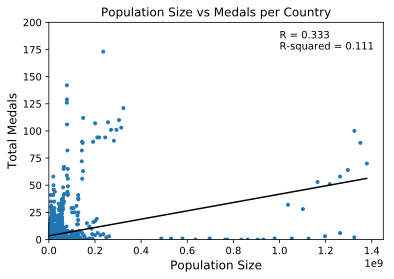

In [120]:
plt.plot(Population, Medal_Won,'.')
plt.title('Population Size vs Medals per Country')
plt.xlabel('Population Size', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)
plt.xlim([0,(1.45*10**9)])
plt.ylim([0,200]);

## LLSR Regression
CombinedMatrix2 = np.column_stack([Population,Intercept])

## Compute A Matrix 
A2 = np.dot(np.transpose(CombinedMatrix2), CombinedMatrix2)
A2 = A2.astype(float) 

## Compute b Vector
b2 = np.dot(Medal_Won, CombinedMatrix2)
b2 = b2.astype(float)

## Solve for best fit paramters
X2 = np.linalg.solve(A2, b2)
print(X2)
print('The most probable value of m is %e, b is %.4f.'%(X2[0],X2[1]))

## Plotting best fit line
TM2 = X2[0] * Population + X2[1]
plt.plot(Population,TM2,'-k');
plt.text(10*10**8, 175, 'R = %0.3f\nR-squared = %0.3f'%(Corr2,CoDet2));

There is a poor correlation between population and medal count. We predict it is because some very large countries with huge populations have not done so well. For example in the 60th and 70th China have been sending teams to Olympics but was not doing well despite its large population. Currently similar story is happening with India, Indonesia and Pakistan who are all sending teams to olympics but winning very small number of medals if winning at all.

In [121]:
## Computing Sample Variance and Confidence Intervals

## Compute the sample variance
S3 = np.sum((TM2-Medal_Won)**2) / N 

## Update A matrix (Hessian Matrix)
A3 = np.dot(np.transpose(CombinedMatrix2), CombinedMatrix2) /S3
A3 = A3.astype(float) 

VarMat3 = la.inv(A3)

print(VarMat3)
SigmaMat3 = np.sqrt(VarMat3)

print('The confidence interval for m is %e.'%(SigmaMat3[0,0]))
print('The confidence interval for b is %.4f.'%(SigmaMat3[1,1]))
print('The 95 percent confidence interval for m is: (%e ± %e)'%(X2[0],SigmaMat3[0,0]*2))
print('The 95 percent confidence interval for b is: (%.4f ± %.4f)'%(X2[1],SigmaMat3[1,1]*2))

[[ 6.20176769e-18 -2.12567443e-10]
 [-2.12567443e-10  1.04279353e-01]]
The confidence interval for m is 2.490335e-09.
The confidence interval for b is 0.3229.
The 95 percent confidence interval for m is: (3.834831e-08 ± 4.980670e-09)
The 95 percent confidence interval for b is: (3.4397 ± 0.6458)


C:\Users\Jian_\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


In [122]:
##Checking Results

Medal_Won = Medal_Won.astype(float)
CombinedMatrix2 = CombinedMatrix2.astype(float)

model = sm.OLS(Medal_Won, sm.add_constant(CombinedMatrix2))
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     236.9
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           1.81e-50
Time:                        17:03:48   Log-Likelihood:                -7683.4
No. Observations:                1907   AIC:                         1.537e+04
Df Residuals:                    1905   BIC:                         1.538e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.835e-08   2.49e-09     15.391      0.0

### Team Size

Here is our code to see if there is a correlation between the team size (the number of athletes send from one country) and the number of medals the country wins. The one issue with this statistic is that there is a lot of other parameters that affects how many athletes the country sends. A big part is that some sports require the athletes to officialy qualify(from performing well in the World Cups, Continent Cups, Gran Prix) to participate and other sports have a much more simplified process to compete. In addition even after qualifying the road to olympics especially for some athletes who do not have a strong support from their country is a huge financial burden. In this study we did not consider any of the special cases, but instead we just looked at the number of athletes who made it to the olympics from each country. 

[ 0.12965482 -2.42134802]
The most probable value of 
m = 1.296548e-01
b = -2.4213


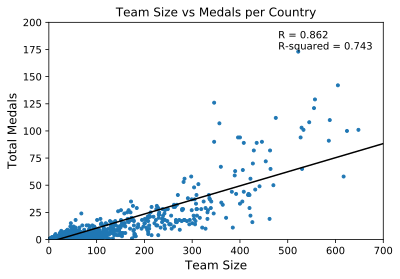

In [123]:
plt.plot(Team_Size, Medal_Won,'.')
plt.title('Team Size vs Medals per Country')
plt.xlabel('Team Size', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)
plt.xlim([0,700])
plt.ylim([0,200]);

## LLSR Regression
CombinedMatrix3 = np.column_stack([Team_Size,Intercept])

## Compute A Matrix 
A3 = np.dot(np.transpose(CombinedMatrix3), CombinedMatrix3)
A3 = A3.astype(float) 

## Compute b Vector
b3 = np.dot(Medal_Won, CombinedMatrix3)
b3 = b3.astype(float)

## Solve for best fit paramters
X3 = np.linalg.solve(A3, b3)
print(X3)
print('The most probable value of \nm = %e\nb = %.4f'%(X3[0],X3[1]))

## Plotting best fit line
TM3 = X3[0] * Team_Size + X3[1]
plt.plot(Team_Size,TM3,'-k');
plt.text(480, 175, 'R = %0.3f\nR-squared = %0.3f'%(Corr3,CoDet3));

Great correlation. Shows that the teams that send more athletes usually perform better. Very logical, as if it si a bigger country with a bigger team then to even get onto the team there was already large competition therefore it is more likely that the athletes from large competitive teams would perform better. 

In [124]:
## Computing Sample Variance and Confidence Intervals

## Compute the sample variance
S4 = np.sum((TM3-Medal_Won)**2) / N 

## Update A matrix (Hessian Matrix)
A4 = np.dot(np.transpose(CombinedMatrix3), CombinedMatrix3) /S4
A4 = A4.astype(float) 

VarMat4 = la.inv(A4)

print(VarMat4)
SigmaMat4 = np.sqrt(VarMat4)

print('The confidence interval for m is %e.'%(SigmaMat4[0,0]))
print('The confidence interval for b is %.4f.'%(SigmaMat4[1,1]))
print('The 95 percent confidence interval for m is: (%e ± %e)'%(X3[0],SigmaMat4[0,0]*2))
print('The 95 percent confidence interval for b is: (%.4f ± %.4f)'%(X3[1],SigmaMat4[1,1]*2))

[[ 3.04627039e-06 -1.68587983e-04]
 [-1.68587983e-04  3.73376873e-02]]
The confidence interval for m is 1.745357e-03.
The confidence interval for b is 0.1932.
The 95 percent confidence interval for m is: (1.296548e-01 ± 3.490714e-03)
The 95 percent confidence interval for b is: (-2.4213 ± 0.3865)


C:\Users\Jian_\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


In [125]:
##Checking Results

Medal_Won = Medal_Won.astype(float)
CombinedMatrix3 = CombinedMatrix3.astype(float)

model = sm.OLS(Medal_Won, sm.add_constant(CombinedMatrix3))
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     5513.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:03:49   Log-Likelihood:                -6498.9
No. Observations:                1907   AIC:                         1.300e+04
Df Residuals:                    1905   BIC:                         1.301e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1297      0.002     74.247      0.0

## Making a model using GDP and Team Size 

#### GDP and Team Size combined Equation: Predicted Medal Tally in Tokyo 2020 = a(Predicted GDP) + b(Predicted Team Size) + c

We used the two parameters that showed the best correlation to predict a model for the number of medals won based on GDP and Team Size. 

In [126]:
## LLSR Regression
CombinedMatrix4 = np.column_stack([GDP,Team_Size,Intercept])

## Compute A Matrix 
A4 = np.dot(np.transpose(CombinedMatrix4), CombinedMatrix4)
A4 = A4.astype(float) 

## Compute b Vector
b4 = np.dot(Medal_Won, CombinedMatrix4)
b4 = b4.astype(float)

## Solve for best fit paramters
X4 = np.linalg.solve(A4, b4)
print(X4)
print('The most probable value of \na = %e\nb = %e\nc = %0.3f.'%(X4[0],X4[1],X4[2]))

[ 2.97580300e-12  1.11374509e-01 -2.01757811e+00]
The most probable value of 
a = 2.975803e-12
b = 1.113745e-01
c = -2.018.


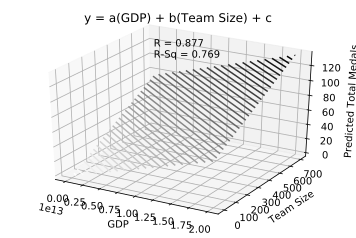

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Calculating Data Points
GDPTeamData = X4[0]*GDP + X4[1]*Team_Size + X4[2]

## Plotting 3D Surface 
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

XX = np.linspace(0, 2*10**13, 1000)
YY = np.linspace(0, 700, 500)
XX, YY = np.meshgrid(XX, YY)
ZZ = X4[0]*XX + X4[1]*YY + X4[2]

ax.contour3D(XX, YY, ZZ, 50, cmap='binary')
ax.set_xlabel('GDP')
ax.set_ylabel('Team Size')
ax.set_zlabel('Predicted Total Medals');
ax.set_title('y = a(GDP) + b(Team Size) + c');
ax.text(0, 700, 100, "R = 0.877\nR-Sq = 0.769", color='black');

In [147]:
## Computing Sample Variance and Confidence Intervals

## Compute the sample variance
S5 = np.sum((GDPTeamData-Medal_Won)**2) / N 

## Update A matrix (Hessian Matrix)
A5 = np.dot(np.transpose(CombinedMatrix4), CombinedMatrix4) /S5
A5 = A5.astype(float) 

VarMat5 = la.inv(A5)

SigmaMat5 = np.sqrt(np.abs(VarMat5))

print('The confidence interval for a is %e.'%(SigmaMat5[0,0]))
print('The confidence interval for b is %.4f.'%(SigmaMat5[1,1]))
print('The confidence interval for c is %.4f.'%(SigmaMat5[2,2]))
print('The 95 percent confidence interval for a is: (%e ± %e)'%(X4[0],SigmaMat5[0,0]*2))
print('The 95 percent confidence interval for b is: (%.4f ± %.4f)'%(X4[1],SigmaMat5[1,1]*2))
print('The 95 percent confidence interval for c is: (%.4f ± %.4f)'%(X4[2],SigmaMat5[2,2]*2))

The confidence interval for a is 2.028830e-13.
The confidence interval for b is 0.0021.
The confidence interval for c is 0.1852.
The 95 percent confidence interval for a is: (2.975803e-12 ± 4.057660e-13)
The 95 percent confidence interval for b is: (0.1114 ± 0.0041)
The 95 percent confidence interval for c is: (-2.0176 ± 0.3705)


In [129]:
##Checking Results

Medal_Won = Medal_Won.astype(float)
CombinedMatrix4 = CombinedMatrix4.astype(float)

model = sm.OLS(Medal_Won, sm.add_constant(CombinedMatrix4))
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     3173.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:03:51   Log-Likelihood:                -6397.0
No. Observations:                1907   AIC:                         1.280e+04
Df Residuals:                    1904   BIC:                         1.282e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.976e-12   2.03e-13     14.656      0.0

### Error Propagation for Predicted Tokyo 2020 Country Medal Count

In [130]:
##Error Propagation for Prediction Number of Medals in 2020 Tokyo 
from uncertainties import ufloat

GDP2020 = np.array([ 2.01*10**13, 1.40*10**12, 3.70*10**12, 1.60*10**13, 2.80*10**12 ])
TeamSize2020 = np.array([558.2, 409.6, 416.8, 432.6, 353.6])

xx = ufloat(2.976*10**-12, 2.03*10**-13)
yy = ufloat(0.1114,0.002)
zz = ufloat(-2.0176,0.185)

ErrProp = xx*GDP2020 + yy*TeamSize2020 + zz
print(ErrProp)

[119.98347999999999+/-4.234314826509714 47.77824+/-0.8866133768447214
 55.42511999999999+/-1.1372181716803509
 93.79003999999999+/-3.3663481756942493 45.70624+/-0.9259780774942785]


## Estimating the probability of winning a medal for athletes using Logistic Regression


Here, the objective is to estimate the probability of winning any medal (Gold, Silver and Bronze) for the athletes for top 5 countries by medal tally. Individual performance of each athletes were counted at the olympics from 1960 to 2016, and the results were converted to one (1) and zero (0) for any medal type and for no medal respectively. The GDP, population size and the Team Size of each country are considered as input parameters for Logistic Regression analysis. 

In [131]:
# importing Data
olympics2 = pd.read_csv('logistic_regression_olympics.csv')
olympics2.head()

,Unnamed: 0,Name,Year,Sport,Team,GDP,Population,Medal_Won,Medal_Won_Corrected,Total_Athletes
0,0,A Dijiang,1992,Basketball,China,4.269160e+11,1.164970e+09,0,53.0,282.0
1,1,A Lamusi,2012,Judo,China,8.560550e+12,1.350695e+09,0,89.0,408.0
2,2,Jyri Tapani Aalto,2000,Badminton,Finland,1.255400e+11,5.176209e+06,0,4.0,70.0
3,3,Minna Maarit Aalto,1996,Sailing,Finland,1.320990e+11,5.124573e+06,0,4.0,76.0
4,4,Minna Maarit Aalto,2000,Sailing,Finland,1.255400e+11,5.176209e+06,0,4.0,70.0


In [132]:
olympics2_drop=olympics2.dropna()

In [150]:
#size of the data
olympics2_drop.shape

(140085, 10)

As it can be seen above, the number of athletic data (rows) exceeds 140,000. Here, We aim to predict the chances of winning a medal for athletes of top five countries by medal tally because only those countries will be likely the winner of Tokyo 2020 olympics as predicted above. Therefore, results of Only top 10 countries by medal tally are taken into account. In addition, it will marginally reduce the size of data that will eventually help to converge the optimization. 

In [134]:
#Selecting only top 10 countries by medal tally
array = ['USA', 'Russia','Germany','China','UK','Australia','France','Japan','Italy','Hungary']
olympics3=olympics2_drop.loc[olympics2_drop['Team'].isin(array)]
olympics3 = olympics3.reset_index()

In [151]:
#Size of reduced data
olympics3.shape

(54917, 11)

Now, let's see if there is a correlation between the parameters (GDP, Population and Team Size) and winning a medal

In [136]:
#Selecting particular rows from the Data Frame
GDP=olympics3[['GDP']]
population=olympics3[["Population"]]
medal=olympics3[['Medal_Won']]
TeamSize=olympics3[['Total_Athletes']]

#Printing the correlation
print(olympics3[['GDP', 'Medal_Won']].corr())
print(olympics3[['Population', 'Medal_Won']].corr())
print(olympics3[['Total_Athletes', 'Medal_Won']].corr())

               GDP  Medal_Won
GDP        1.00000    0.10894
Medal_Won  0.10894    1.00000
            Population  Medal_Won
Population    1.000000   0.021509
Medal_Won     0.021509   1.000000
                Total_Athletes  Medal_Won
Total_Athletes        1.000000   0.159786
Medal_Won             0.159786   1.000000


It seems that there is no correlation between the population and winning a medal, as previously shown. So, let's remove the population, and consider only two parameters for logistic regression. Also, prior starting the analysis, it is better to make the values of GDP and Team Size the same orders of magnitude. 

In [137]:
GDP1=GDP/10**12
TeamSize1=TeamSize/100

#Convert the Pandas Data Frame to Numpy array 
GDP1_values=GDP1.values
TeamSize1_values=TeamSize1.values
medal_values=medal.values

The probability that the athlete will win a medal is related to GDP and the Team Size of the country he or she is from. The problem can be modeled by logistic function,


$$F(x) = \frac{1}{1 + e^{-(\beta_0 +\beta_1 \text{GDP} +\beta_2\text{Team Size})}}, $$


where $F(x)$ is the probability of winning a medal as function of the number of GDP and Team Size.  The parameters $\beta_0$ and $\beta_1$ are unknown parameters of the model. Let's Estimate the most probable values of the parameters $\beta_0$ and $\beta_1$ 



## Posterior Distribution

The posterior distribution for the unknown parameters $\beta_0$, $\beta_1$ and $\beta_2$ is given by,

$$\text{prob}(\beta_0,\beta_1,\beta_2 \mid ) \propto \text{prob}(\{x_k,y_k,l_k\} \mid \beta_0,\beta_1,\beta_2, I) \times \text{prob}(\beta_0,\beta_1,\beta_2 \mid I) $$,

where, $x_k $, and $y_k$ are GDP and Team Size, respectively, and $l_k$ is binary outcome of althletic performances, $l_k$={${{0,1}}$}
   
For simplicity, we chose a uniform prior distribution,
   
$$\text{prob}(\beta_0, \beta_1,\beta_2 \mid I) = \text{constant} $$,
    
The likelihood function is given by,
   
$$\text{prob}(\{x_k,y_k,l_k\} \mid \beta_0, \beta_1,\beta_2, I) = \prod_{k=1}^N F(x_k,y_k)^{l_k} [1-F(x_k,y_k)]^{(1-l_k)}$$,
    
The logarithm of the posterior distribution is,
   
$$ L(\beta_0,\beta_1\beta_2) = \text{constant} + \sum_{k=1}^N l_k \ln[F(x_k,y_k)] + (1-l_k)\ln[1 - F(x_k,y_k)] $$,
    
Substituting the definition of $F(x)$, this distribution can be simplified as,
    
$$ L(\beta_0,\beta_1\beta_2) = \text{constant} + \sum_{k=1}^N - (1-l_k)(\beta_0 + \beta_1 x_k +\beta_2 y_k) - \ln[1 + e^{-(\beta_0 + \beta_1 x_k +\beta_2 y_k)} ] $$

## Most probable parameter values

The most probable parameter values are those which maximizes the posterior distribution

In [138]:
def negLogPosterior(beta, param):
    b0,b1,b3 = beta
    GDP1_values,TeamSize1_values,medal_values = param
    tk = b0+b1*GDP1_values+b3*TeamSize1_values
    return   np.sum((1-medal_values) * tk + np.log(1 + np.exp(-tk)))

In [139]:
result = minimize(negLogPosterior, [-2,0.01,0.01], [GDP1_values,TeamSize1_values,medal_values])
print(result)

      fun: 27583.124286562186
 hess_inv: array([[ 1.14960490e-03,  2.98673369e-05, -2.79299644e-04],
       [ 2.98673369e-05,  8.27290289e-06, -1.36783633e-05],
       [-2.79299644e-04, -1.36783633e-05,  7.95148328e-05]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 70
      nit: 9
     njev: 14
   status: 0
  success: True
        x: array([-2.38373326,  0.02401548,  0.25211155])


In [153]:
## Estimate confidence intervals (normal approximation)
covar=result.hess_inv

print('Confidence interval for β0:[%f, %f]'%(
    norm.ppf(0.025,result.x[0],np.sqrt(covar[0,0])),
    norm.ppf(0.975,result.x[0],np.sqrt(covar[0,0]))))
print('Confidence interval for β1:[%f, %f]'%(
    norm.ppf(0.025,result.x[1],np.sqrt(covar[1,1])),
    norm.ppf(0.975,result.x[1],np.sqrt(covar[1,1]))))
print('Confidence interval for β2:[%f, %f]\n'%(
    norm.ppf(0.025,result.x[2],np.sqrt(covar[2,2])),
    norm.ppf(0.975,result.x[2],np.sqrt(covar[2,2]))))

Confidence interval for β0:[-2.450187, -2.317279]
Confidence interval for β1:[0.018378, 0.029653]
Confidence interval for β2:[0.234634, 0.269589]



In [141]:
#Predicted GDP and Team Size values
GDP2020 = np.array([ 2.01*10**13, 1.40*10**12, 3.70*10**12, 1.60*10**13, 2.80*10**12 ])
TeamSize2020 = np.array([558.2, 409.6, 416.8, 432.6, 353.6])
GDP2020_1=GDP2020/10**12
TeamSize2020_1=TeamSize2020/100

#predicting the probabiity of winning a medal
Probability=1/(1+np.exp(-(-2.38373326+0.02401548*GDP2020_1+0.25211155*TeamSize2020_1)))

In [142]:
print('Probability of winning a medal for USA Athletes is %0.3f'%(Probability[0]))
print('Probability of winning a medal for Russia/Sovie Union Athletes is %0.3f'%(Probability[1]))
print('Probability of winning a medal for Germany Athletes is %0.3f'%(Probability[2]))
print('Probability of winning a medal for China Athletes is %0.3f'%(Probability[3]))
print('Probability of winning a medal for UK Athletes is %0.3f'%(Probability[4]))

Probability of winning a medal for USA Athletes is 0.379
Probability of winning a medal for Russia/Sovie Union Athletes is 0.211
Probability of winning a medal for Germany Athletes is 0.224
Probability of winning a medal for China Athletes is 0.287
Probability of winning a medal for UK Athletes is 0.194


## Results:
### Predicting Medal Tallies for Top 5 Countries and Probability of Winning a Medal in Tokyo 2020

To predict the medal count we had to estimate and predict the GDP and the team sizes of the top 5 perfroming countries. The estimation for GDP was taken from official report published by pwc which accounted for the estimate growth of all the countries. To estimate the team size we tries to find a trend in the team sizes from the past years, however as the trend was very linear we decided to estimate it by averaging the team size of the past five summer olympics(2000-2016). The estimations used to find the medal tally in Tokyo 2020 are shown in the table below. 

In [154]:
from prettytable import PrettyTable
z = PrettyTable()

z.field_names = ["Country", "Predicted GDP in trillion $ in 2020", "Predicted Team Size in 2020"]

z.add_row(["USA", 20.1, 558.2])
z.add_row(["Russia/Soviet Union", 1.4, 409.6])
z.add_row(["Germany", 3.7, 416.8])
z.add_row(["China", 16, 432.6])
z.add_row(["UK", 2.8, 353.6])

print(z)

+---------------------+-------------------------------------+-----------------------------+
|       Country       | Predicted GDP in trillion $ in 2020 | Predicted Team Size in 2020 |
+---------------------+-------------------------------------+-----------------------------+
|         USA         |                 20.1                |            558.2            |
| Russia/Soviet Union |                 1.4                 |            409.6            |
|       Germany       |                 3.7                 |            416.8            |
|        China        |                  16                 |            432.6            |
|          UK         |                 2.8                 |            353.6            |
+---------------------+-------------------------------------+-----------------------------+


Using our formula: Predicted Medal Tally in Tokyo 2020 = a(Predicted GDP) + b(Predicted Team Size) + c, we predicted the total medal tally for 5 countries in Tokyo 2020.

In [144]:
h = PrettyTable()

h.field_names = ["Country", "Total Medal Count (1964-2016)", "Medal Count in Rio 2016", "Predicted Medal Count in Tokyo 2020", "Probability of Getting a Medal"]

h.add_row(["USA", 1463, 121, "120 ± 4",0.379])
h.add_row(["Russia/Soviet Union", 1298, 56, "48 ± 1",0.211])
h.add_row(["Germany", 1042, 42, "55 ± 1",0.224])
h.add_row(["China", 545, 70, "94 ± 3",0.287])
h.add_row(["UK", 417, 67, "46 ± 1",0.194])

print(h)

+---------------------+-------------------------------+-------------------------+-------------------------------------+--------------------------------+
|       Country       | Total Medal Count (1964-2016) | Medal Count in Rio 2016 | Predicted Medal Count in Tokyo 2020 | Probability of Getting a Medal |
+---------------------+-------------------------------+-------------------------+-------------------------------------+--------------------------------+
|         USA         |              1463             |           121           |               120 ± 4               |             0.379              |
| Russia/Soviet Union |              1298             |            56           |                48 ± 1               |             0.211              |
|       Germany       |              1042             |            42           |                55 ± 1               |             0.224              |
|        China        |              545              |            70           | 

## Conclusion:

The two most important parameters out of the four parameters we analyzed for predicting success for a country at the Olympics are GDP and the size of the team sent to the Olympics. Our analysis showed a large bias of medal count towards rich countries who can afford to send bigger teams to the Olympics. We showed that in the future just based on the two factors in consideration, USA will again win the medal count in Tokyo 2020. In addition, if you become part of the USA Olympic team you have the highest chance of winning a medal at the Olympics. This means that USA is most likely giving the largest funding and resources to their teams therefore ensuring successful performances. 

It was found that the population and GDP per capita are not good predictors of the success for the country. GDP per capita prioritizes smaller richer European and Asian countries who historically have not done well or even participated in Olympics. Population correlation showed that there are number of countries with large populations who did not end up doing well in Olympics. Those countries more recently have been India, Nigeria, Pakistan and Indonesia and in 1970s was China. 

We admit that even given our statistical evaluation the most important indication of success at the Olympics are the athletes themselves who are working tirelessly to become the strongest at their chosen sport. In this study we were just trying to show that the country of origin also does play a role in the success of the athlete as the richer countries would be able to provide better resources, better couches and funding to help the successful athletes get to Olympics and win medals. Overall our study indicates that richer countries who have better resources to prepare the athletes would on average outperform the athletes who come from poorer countries. 


## Future Studies and Considerations: 
### Future Studies:
Our study is not all encompassing and there are many more considerations that should be taken into account for making the medal prediction more accurate. 

-	Host Team: 
 - Host Teams historically have been achieving better results, therefore a future study can be done to see the impact of hosting the olympics on the medal count of the hosting team. 

-	New Sports Addition: 
 - For future studies the new sport additions could be considered as they will increase the total number of athletes and medals awarded. In Tokyo 2020 there will be an addition of 5 new sports. This will lead to a total of 18 new events (54 medals) and addition of 474 athletes in Tokyo 2020. 

-	Life expectancy:
 - A study that considers the correlation between ife expectancy and the medal count. could be done. Life expectancy positively correlates with the health condition of the country, whcih also shows how rich the country is. Therefore, the countries with the highest life expectancy would theoretically have bigger pool of healthy athletes to choose from. 


### Other Considerations Impacting Medal Count:
There are a lot of other considerations that cannot really be measured but which will greatly impact the final medal tally at any given Olympics. 
-	Doping Concerns:
 - We cannot account for doping issues. Some teams like Russia have been heavily involved in the doping scandals. During Rio 2016, the whole track and field Russian team was banned from Olympics. That significantly reduced the number of medals gained by Russia and increased number of medals gained by other countries. If this issue will be repeated for Russian team or any other team, the medal count will be significantly impacted. 

-	Political Instability: 
 - Different regions in the past have been heavily affected by political unrest and therefore were not able to perform as well in the Olympics. Specifically recently, Middle East have been heavily affected. In Rio 2016, it was the first Olympics that allowed for a refugee team to participate. 

 


## References

- Bishop, Kyle. "Data Analysis: Lecture Notes 1-19". 2018.
- "Sports Reference | Sports Stats, Fast, Easy, And Up-To-Date | Sports-Reference.Com". Sports-Reference.Com, 2018, https://www.sports-reference.com/. Accessed 6 Dec 2018.
- Griffin, Randi H. "120 Years Of Olympic History: Athletes And Results". Kaggle.Com, 2018, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results#athlete_events.csv. Accessed 6 Dec 2018. 
- "World Bank Group - International Development, Poverty, & Sustainability". World Bank, 2018, http://www.worldbank.org/. Accessed 6 Dec 2018.
- The World In 2050". Pwc, 2018, https://www.pwc.com/gx/en/issues/economy/the-world-in-2050.html. Accessed 6 Dec 2018.

- "Olympic Games". En.Wikipedia.Org, 2018, https://en.wikipedia.org/wiki/Olympic_Games. Accessed 6 Dec 2018.
- IOC Approves Five New Sports For Olympic Games Tokyo 2020". International Olympic Committee, 2018, https://www.olympic.org/news/ioc-approves-five-new-sports-for-olympic-games-tokyo-2020. Accessed 9 Dec 2018.
